In [17]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform, io, data
from scipy import signal
from IPython.display import display
from skimage.color import rgb2gray
%matplotlib inline

In [31]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

In [32]:
mask = np.ones((3,3))
mask = mask * (1/mask.size)
display(mask)

orig_img = data.camera()
conv_img = np.zeros(shape=orig_img.shape)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [33]:
mask_shape = mask.shape
orig_img_shape = orig_img.shape

In [34]:
for i  in range(0,orig_img_shape[0] - mask_shape[0]+1):
    for j in range(0, orig_img_shape[1] - mask_shape[1]+1):
        mask_img_mult = orig_img[i:i+mask_shape[0],j:j+mask_shape[1]] * mask
        conv_img[i + 1 , j + 1] = np.sum(mask_img_mult)

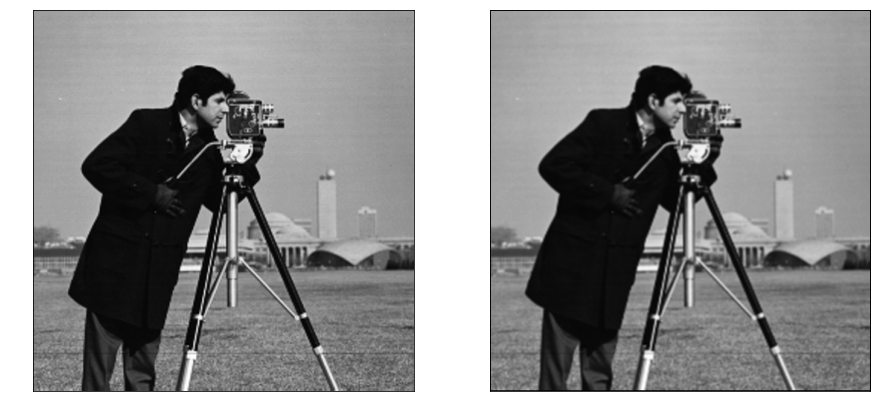

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(orig_img,cmap='gray')
plt.subplot(122)
plt.imshow(conv_img.astype(dtype=np.uint8),cmap='gray')

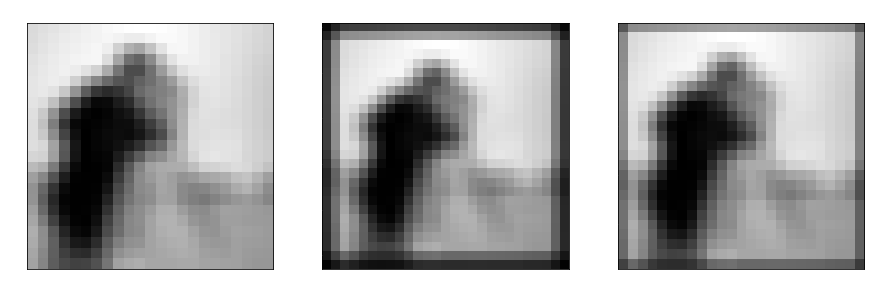

In [36]:
kernel = mask
orig_img2 = transform.resize(orig_img,np.floor(np.array(orig_img_shape)/20).astype(np.uint8))
full_conv = signal.convolve2d(orig_img2, kernel, mode='full')
valid_conv = signal.convolve2d(orig_img2, kernel, mode='valid')
same_conv = signal.convolve2d(orig_img2, kernel, mode='same')
plt.figure(figsize=(15, 10))
plt.set_cmap('gray')
plt.subplot(131)
plt.imshow(valid_conv)
plt.title("Valid Convolution")
plt.subplot(132)
plt.title("Full Convolution")
plt.imshow(full_conv)
plt.subplot(133)
plt.title("Same Convolution")
plt.imshow(same_conv)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

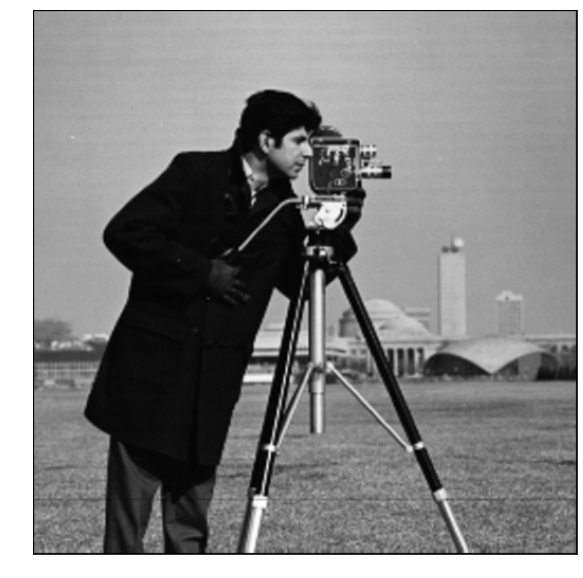

In [37]:
kernel = np.outer(signal.gaussian(3, 0.5), signal.gaussian(3, 0.5))
kernel = kernel / np.sum(kernel)
display(kernel)
plt.figure(figsize=(15, 10))
plt.imshow(signal.convolve2d(orig_img,kernel))

Text(0.5, 1.0, 'Sobel 2')

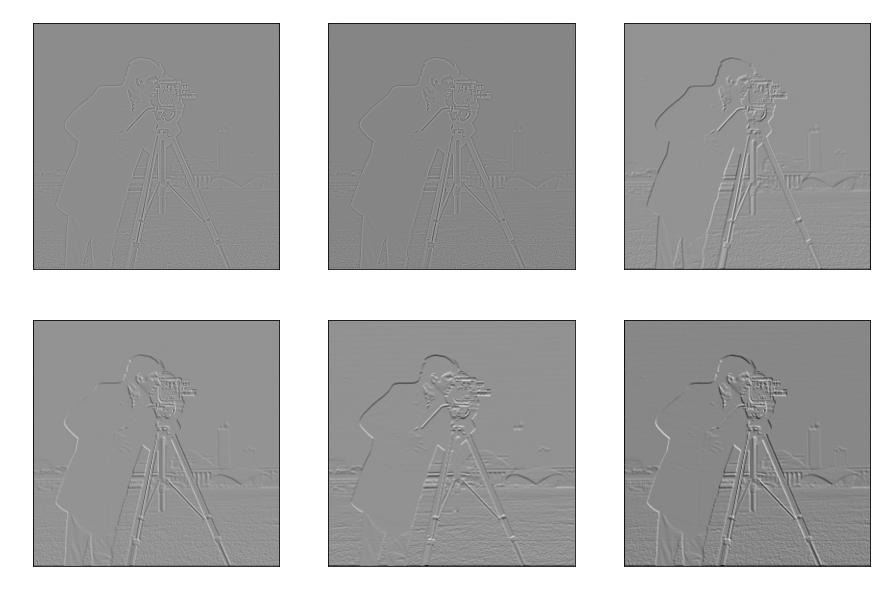

In [38]:
laplace_1_mask = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

laplace_2_mask = np.ones((3,3))
laplace_2_mask[1,1] = -8

roberts_1_mask = np.array([[1, 0],[0, -1]])
roberts_2_mask = np.array([[0, 1],[-1, 0]])

sobel_1_mask = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_2_mask = np.array([[0, 1, 2], [-1, 0, 1], [-1, -2, 0]])
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(signal.convolve2d(orig_img,laplace_1_mask))
plt.title("Laplace 1")
plt.subplot(232)
plt.imshow(signal.convolve2d(orig_img,laplace_2_mask))
plt.title("Laplace 2")
plt.subplot(233)
plt.imshow(signal.convolve2d(orig_img,roberts_1_mask))
plt.title("Roberts 1")
plt.subplot(234)
plt.imshow(signal.convolve2d(orig_img,roberts_2_mask))
plt.title("Robert 2")
plt.subplot(235)
plt.imshow(signal.convolve2d(orig_img,sobel_1_mask))
plt.title("Sobel 1")
plt.subplot(236)
plt.imshow(signal.convolve2d(orig_img,sobel_2_mask))
plt.title("Sobel 2")

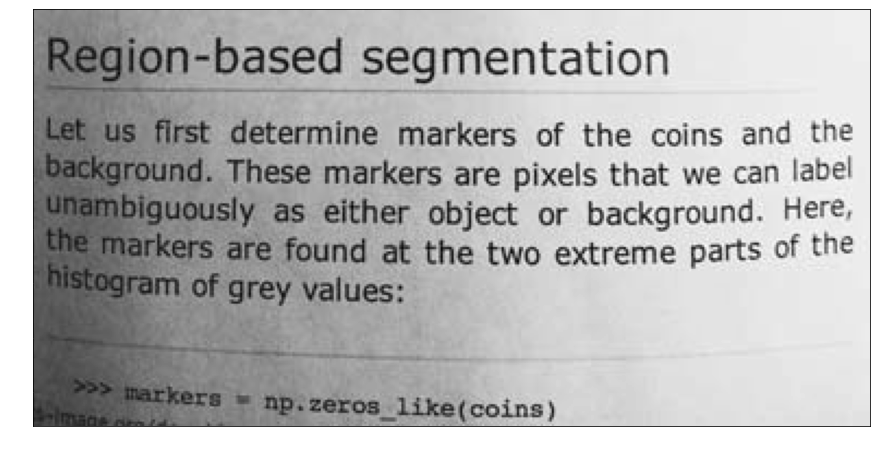

In [39]:
plt.figure(figsize=(15,10))
plt.imshow(data.page())

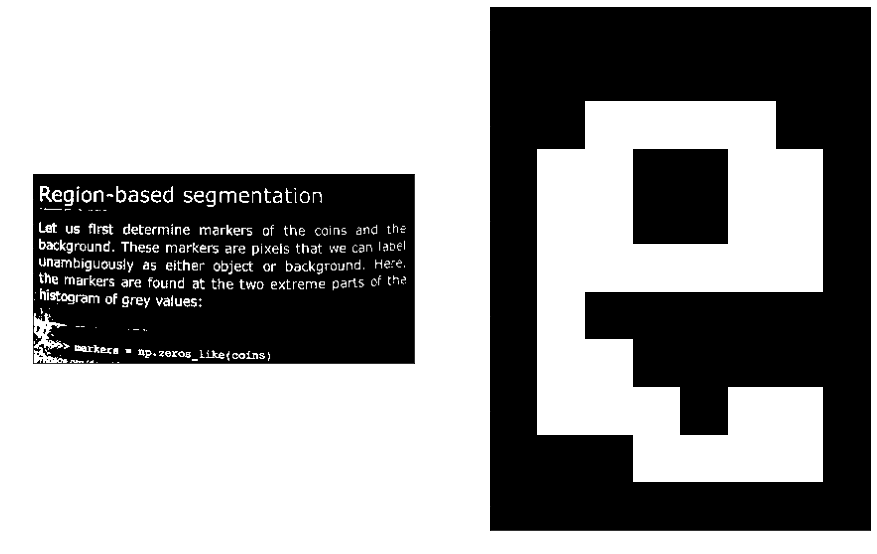

In [40]:
img_with_text = exposure.equalize_adapthist(data.page()) < 0.35
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img_with_text)
kernel  = transform.rotate(img_with_text[104:115, 63:71],180)
plt.subplot(122)
plt.imshow(transform.rotate(kernel,180))

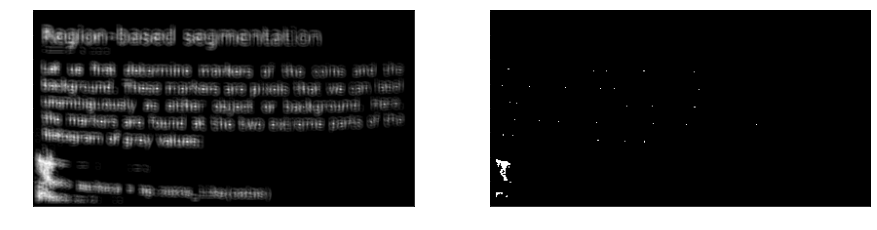

In [41]:
plt.figure(figsize=(15,10))

plt.subplot(121)
out  = signal.convolve2d(img_with_text.astype(np.float), kernel)
plt.imshow(out)
plt.subplot(122)
plt.imshow(out>0.8*np.max(out))

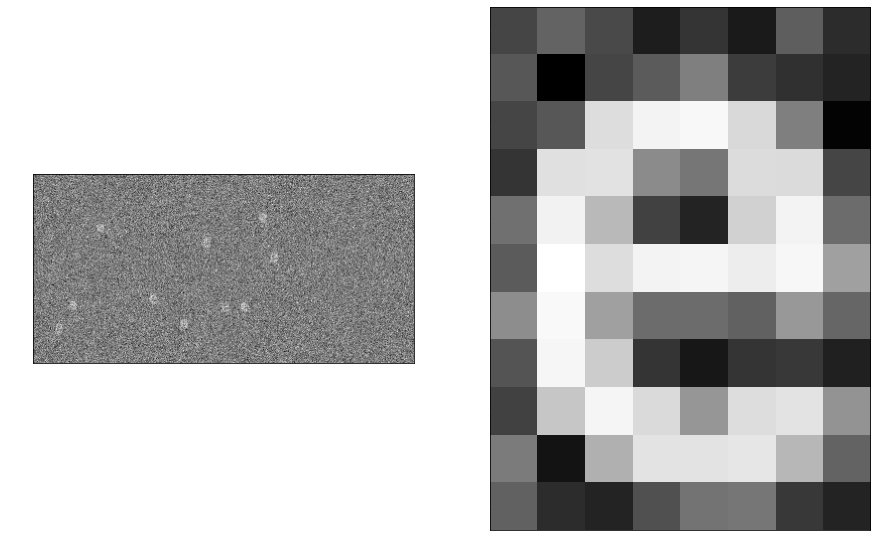

In [42]:
img_with_text = exposure.equalize_hist(data.page())
plt.figure(figsize=(15,10))
plt.subplot(121)
kernel  = 255 -transform.rotate(img_with_text[104:115, 63:71],180)*255
img_with_text =np.ones(shape=img_with_text.shape)*150
random_positions = np.random.rand(10,2)
random_positions[:,0] = random_positions[:,0]* (img_with_text.shape[0] -kernel.shape[0])
random_positions[:,1] = random_positions[:,1]* (img_with_text.shape[1] -kernel.shape[1])
random_positions = np.floor(random_positions).astype(np.uint8)
for rand_pos in random_positions:
    img_with_text[rand_pos[0]:rand_pos[0]+kernel.shape[0],rand_pos[1]:rand_pos[1]+kernel.shape[1]] = transform.rotate(kernel,180)

img_with_text= img_with_text+ np.random.randn(img_with_text.shape[0],img_with_text.shape[1])*50

plt.imshow(img_with_text)

plt.subplot(122)
plt.imshow(transform.rotate(kernel,180))

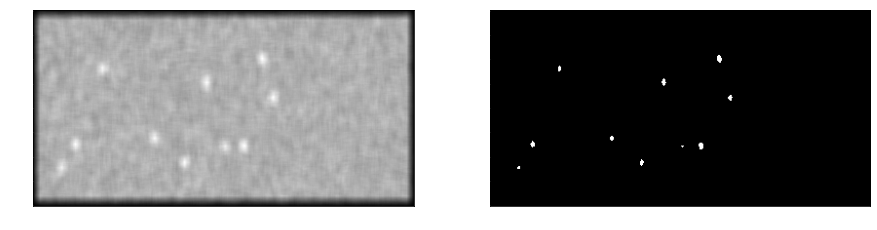

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(121)
out  = signal.convolve2d(img_with_text.astype(np.float), kernel)
plt.imshow(out)
plt.subplot(122)
plt.imshow(out>0.9*np.max(out))

# Prerobit cvicenie 1:1
# dokoncit bonusovu ulohu, najst obrazok na internete s vyhladatelnym vzorom

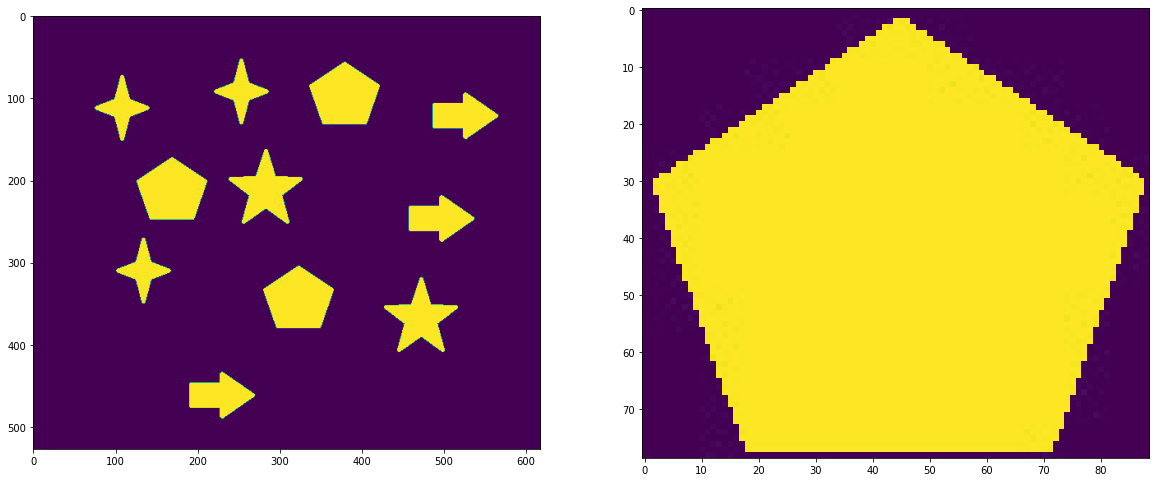

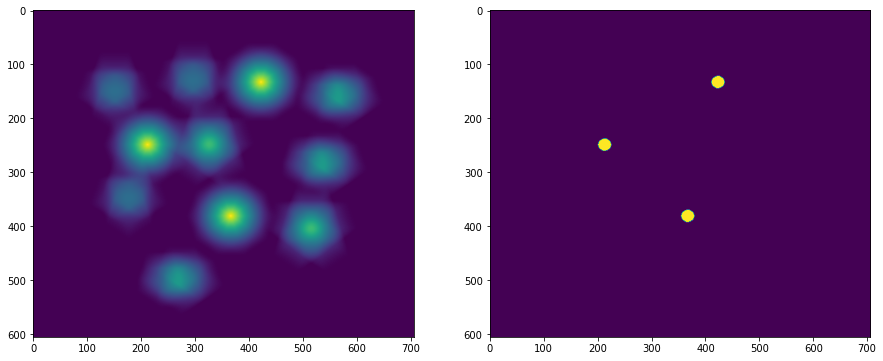

In [32]:
obr = io.imread("imgs/obr.jpg")
obr=0.2126 * obr[:,:,0] + 0.7152 * obr[:,:,1] + 0.0722 * obr[:,:,2]
obr=np.ones(obr.shape)*255-obr
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(obr)
kernel  = transform.rotate(obr[55:134,334:423],180)
plt.subplot(122)
plt.imshow(transform.rotate(kernel,180))

plt.figure(figsize=(15,10))

plt.subplot(121)
out  = signal.convolve2d(obr.astype(np.float), kernel)
plt.imshow(out)
plt.subplot(122)
plt.imshow(out>0.8*np.max(out))